In [13]:
import pandas as pd
import numpy as np
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
excel_path = r"./mock/AntiBio1.xlsx"

In [3]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df_compounds = tables_dict["TLantTest"]['dataframe']
df_bacterias = tables_dict["Table4"]['dataframe']
df_experiments = tables_dict["Table5"]['dataframe']


worksheet name: Table
tables in worksheet: 0

worksheet name: CompoundsData
tables in worksheet: 1
table name: TLantTest

worksheet name: BacteriasData
tables in worksheet: 1
table name: Table4

worksheet name: ExperimentsData
tables in worksheet: 1
table name: Table5

worksheet name: Legend-Main
tables in worksheet: 1
table name: T_Legend_main

worksheet name: Bac
tables in worksheet: 1
table name: T_Bacteria


In [4]:
df_experiments.head()

,RE,Bacteria,Is_Salt,Stunting diameter
0,La,Staphylococcus aureus,1,25
1,Ce,Staphylococcus aureus,1,23
2,Pr,Staphylococcus aureus,1,22
3,Sm,Staphylococcus aureus,1,20
4,Eu,Staphylococcus aureus,1,22


In [5]:
df_compounds.head()

,RE,"rRE, (VI),Ǻ1","cRE, отн. Ед",СТ,КЧ,КЧ2,рН,lgβ,Electronic structure RE3+,Price
0,La,1.03,2.49,1,11,11,4.44,0.8,600.430.520,138000
1,Ce,1.01,2.61,1,11,11,4.20,0.9,601.43,32790
2,Pr,0.99,2.24,2,10,10,4.51,0.9,602.43,98500
3,Sm,0.96,1.90,2,10,10,5.08,0.9,602.433,97000
4,Eu,0.95,1.81,2,10,10,5.56,0.8,602.434,134500


In [6]:
df_bacterias.head()

,Name,Gram-stain,Wall thickness min,Wall thickness max,Wall structure,Wall composition 1,Wall composition 2,Outer membrane,Membrane pore diameter min,Membrane pore diameter max,Proteins,Penicillin sensitivity,Well layers
0,Staphylococcus aureus,1,20,60,1,1,2,0,1,6,1,2,2
1,Escherichia coli,-1,14,18,2,0,1,1,1,15,2,1,1
2,Pseudomonas aeruginosa,-1,14,18,2,0,1,1,1,15,2,1,1
3,Klebsiella pneumoniae,-1,14,18,2,0,1,1,1,15,2,1,1


Let's drop names of compounds and bacteria. Also, we will drop price information because it doesn't affect the target variable. For now, we will drop electronic structure and lgβ because we should make some efforts to interpret them for the model. Membrane pore diameter min is also not interesting for us because it has the same value for all bacteria

In [80]:
df = df_experiments.merge(df_compounds, left_on='RE', right_on='RE').merge(df_bacterias, left_on='Bacteria', right_on='Name')
df = df.drop(['RE', 'Bacteria', 'Membrane pore diameter min', 'Price', 'Name', 'Electronic structure RE3+', 'lgβ'], axis=1)
df.head()

,Is_Salt,Stunting diameter,"rRE, (VI),Ǻ1","cRE, отн. Ед",СТ,КЧ,КЧ2,рН,Gram-stain,Wall thickness min,Wall thickness max,Wall structure,Wall composition 1,Wall composition 2,Outer membrane,Membrane pore diameter max,Proteins,Penicillin sensitivity,Well layers
0,1,25,1.03,2.49,1,11,11,4.44,1,20,60,1,1,2,0,6,1,2,2
1,0,38,1.03,2.49,1,11,11,4.44,1,20,60,1,1,2,0,6,1,2,2
2,1,23,1.01,2.61,1,11,11,4.20,1,20,60,1,1,2,0,6,1,2,2
3,0,40,1.01,2.61,1,11,11,4.20,1,20,60,1,1,2,0,6,1,2,2
4,1,22,0.99,2.24,2,10,10,4.51,1,20,60,1,1,2,0,6,1,2,2


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Is_Salt,99.0,0.484848,0.502314,0.00,0.000,0.00,1.00,1.00
Stunting diameter,99.0,29.505051,10.562133,0.00,21.000,27.00,40.00,50.00
"rRE, (VI),Ǻ1",99.0,0.924949,0.068383,0.75,0.885,0.92,0.99,1.03
"cRE, отн. Ед",99.0,2.226263,0.277292,1.78,2.020,2.24,2.49,2.68
СТ,99.0,3.252525,1.955335,1.00,2.000,2.00,4.50,7.00
КЧ,99.0,9.373737,1.411222,6.00,9.000,10.00,10.00,11.00
КЧ2,99.0,9.373737,1.411222,6.00,9.000,10.00,10.00,11.00
рН,99.0,4.814040,1.203583,1.87,4.440,5.16,5.63,5.96
Gram-stain,99.0,-0.373737,0.932255,-1.00,-1.000,-1.00,1.00,1.00
Wall thickness min,99.0,15.878788,2.796765,14.00,14.000,14.00,20.00,20.00


In [82]:
df.dtypes

Is_Salt                         int64
Stunting diameter               int64
rRE, (VI),Ǻ1                  float64
cRE, отн. Ед                  float64
СТ                              int64
КЧ                              int64
КЧ2                             int64
рН                            float64
Gram-stain                      int64
Wall thickness min              int64
Wall thickness max              int64
Wall structure                  int64
Wall composition 1              int64
Wall composition 2              int64
Outer membrane                  int64
Membrane pore diameter max      int64
Proteins                        int64
Penicillin sensitivity          int64
Well layers                     int64
dtype: object

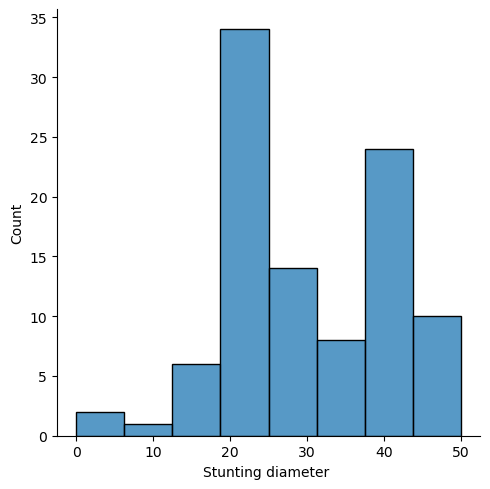

In [83]:
sns.displot(df['Stunting diameter '])

In [117]:
from sklearn.model_selection import train_test_split

X = df.drop('Stunting diameter ', axis=1)
y = df['Stunting diameter ']


In [85]:
!pip install xgboost

In [86]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 

In [107]:
def draw_importance(importances, model_name):
    features = {}
    for i, feature in enumerate(X.columns):
        features[f"f{i+1}"] = feature

    indices = np.argsort(importances)[::-1]
    num_to_plot = len(X.columns)
    feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

    print("Feature ranking:")
    for f in range(num_to_plot):
        print(
            "%d. %s %f "
            % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
        )
    plt.figure(figsize=(16, 6))
    plt.title(f"Feature importance in {model_name}")
    bars = plt.bar(
        range(num_to_plot),
        importances[indices[:num_to_plot]],
        color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
        align="center",
    )
    ticks = plt.xticks(range(num_to_plot), feature_indices)
    plt.xlim([-1, num_to_plot])
    plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices]);
    

In [101]:
parameters = {
    'n_estimators': range(100, 1000, 50),
    'max_depth': [None] + list(range(3, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_random_forest = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.443499546582283
{'max_depth': 3, 'n_estimators': 100}


Feature ranking:
1. Is_Salt 0.777727 
2. рН 0.074533 
3. СТ 0.041025 
4. cRE, отн. Ед 0.027559 
5. КЧ2 0.020655 
6. rRE, (VI),Ǻ1 0.014444 
7. КЧ 0.010602 
8. Wall structure 0.004273 
9. Wall composition 2 0.004094 
10. Gram-stain 0.004058 
11. Outer membrane 0.003621 
12. Wall thickness max 0.003233 
13. Wall composition 1 0.003106 
14. Well layers 0.002615 
15. Penicillin sensitivity 0.002575 
16. Wall thickness min 0.002569 
17. Membrane pore diameter max 0.002567 
18. Proteins 0.000744 


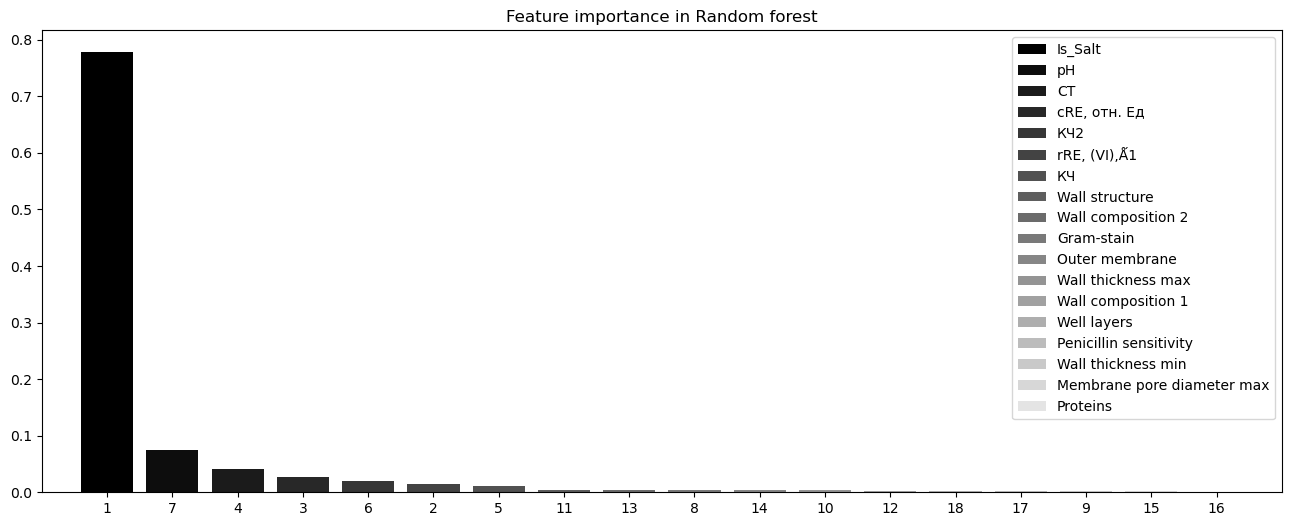

In [108]:
draw_importance(best_random_forest.feature_importances_, "Random forest")



In [100]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_gradient_boost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.522179620846701
{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 8}


Feature ranking:
1. Is_Salt 0.900402 
2. рН 0.057571 
3. СТ 0.042027 
4. Penicillin sensitivity 0.000000 
5. rRE, (VI),Ǻ1 0.000000 
6. cRE, отн. Ед 0.000000 
7. КЧ 0.000000 
8. КЧ2 0.000000 
9. Gram-stain 0.000000 
10. Well layers 0.000000 
11. Wall thickness max 0.000000 
12. Wall structure 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Wall thickness min 0.000000 


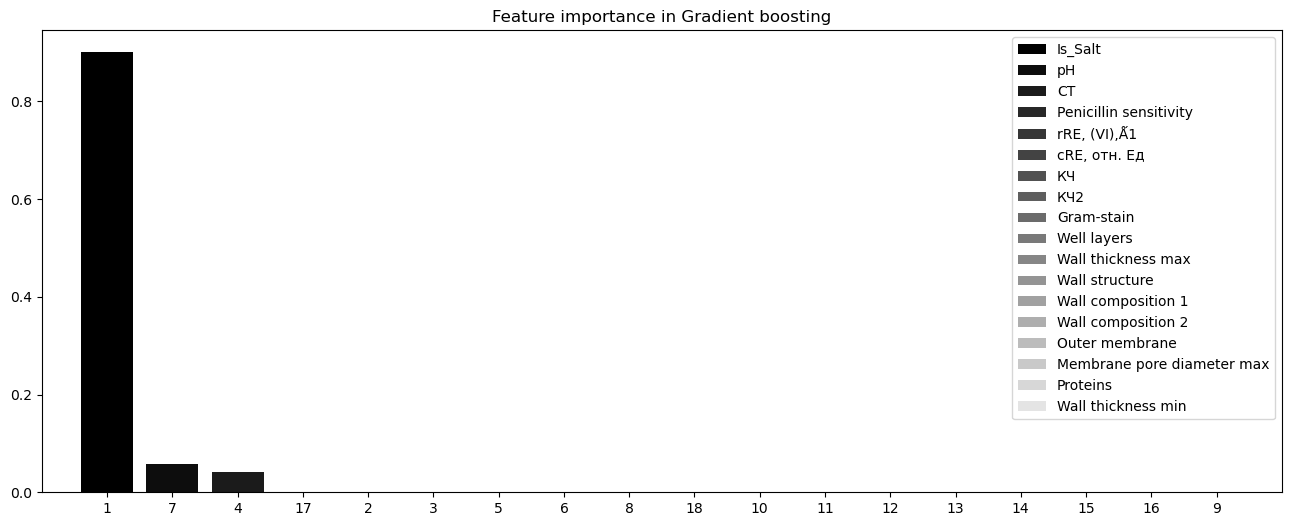

In [109]:
draw_importance(best_gradient_boost.feature_importances_, "Gradient boosting")

In [115]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17, 18, 20],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_xgboost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.420565213655171
{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 17, 'subsample': 1.0}


Feature ranking:
1. Is_Salt 0.747050 
2. СТ 0.037182 
3. Wall thickness max 0.032247 
4. cRE, отн. Ед 0.032013 
5. рН 0.031118 
6. Gram-stain 0.026927 
7. rRE, (VI),Ǻ1 0.021384 
8. Wall thickness min 0.021005 
9. КЧ2 0.017896 
10. КЧ 0.017486 
11. Wall structure 0.015693 
12. Penicillin sensitivity 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Well layers 0.000000 


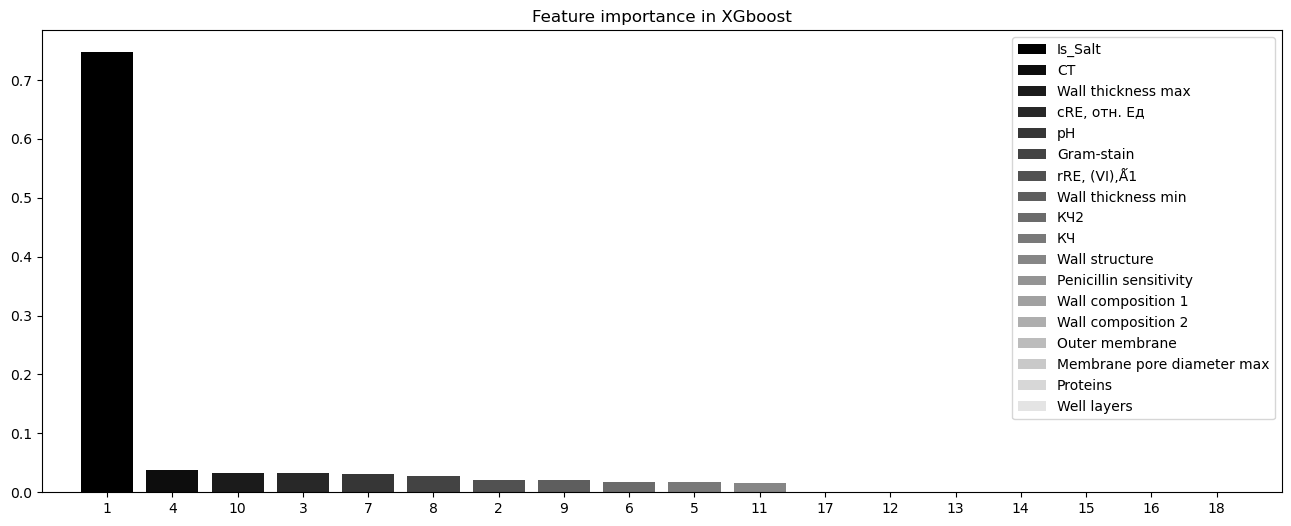

In [116]:
draw_importance(best_xgboost.feature_importances_, "XGboost")

## Сonclusion

We can see, that environment condition where compound take place hardly affect model, so let's split datasets and train to different models for salts and solution.

In [120]:
X_salts = X[X['Is_Salt'] == 1]
y_salts = y[X['Is_Salt'] == 1]

X_solution = X[X['Is_Salt'] == 0]
y_solution = y[X['Is_Salt'] == 0]

In [126]:
parameters = {
    'n_estimators': range(50, 1000, 50),
    'max_depth': [None] + list(range(1, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_random_forest_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.889439783857557
{'max_depth': 1, 'n_estimators': 900}


Feature ranking:
1. СТ 0.408889 
2. cRE, отн. Ед 0.151111 
3. КЧ2 0.120000 
4. КЧ 0.100000 
5. рН 0.085556 
6. rRE, (VI),Ǻ1 0.078889 
7. Well layers 0.008889 
8. Wall structure 0.008889 
9. Wall composition 1 0.006667 
10. Penicillin sensitivity 0.006667 
11. Wall thickness max 0.005556 
12. Gram-stain 0.005556 
13. Membrane pore diameter max 0.004444 
14. Wall thickness min 0.003333 
15. Wall composition 2 0.002222 
16. Proteins 0.002222 
17. Outer membrane 0.001111 
18. Is_Salt 0.000000 


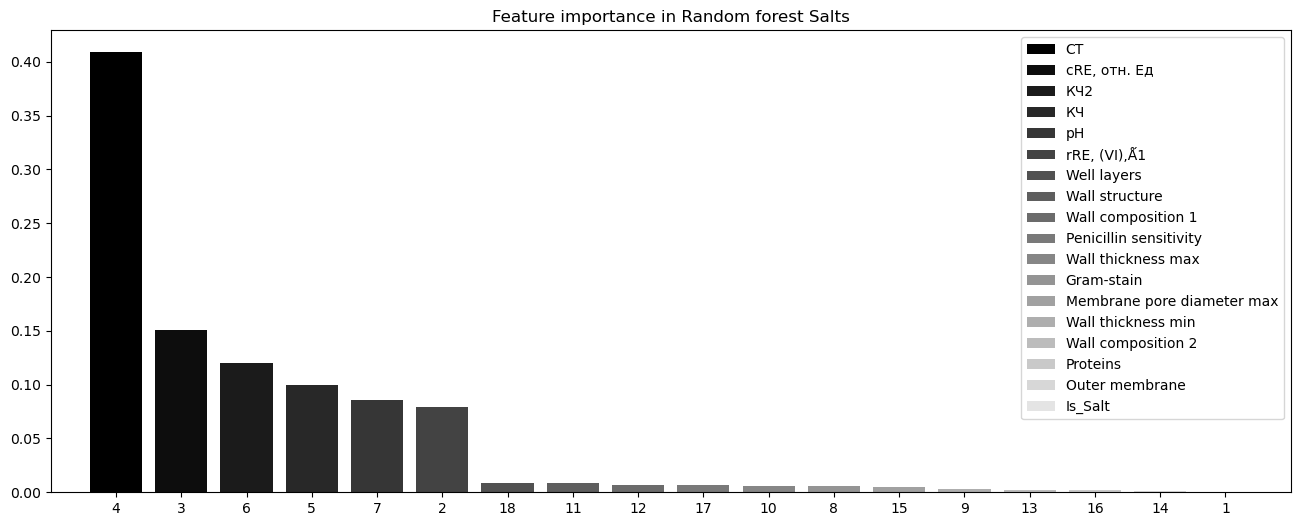

In [127]:
draw_importance(best_random_forest_salts.feature_importances_, "Random forest Salts")

In [123]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_gradient_boost_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.3980292352186963
{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2}


Feature ranking:
1. cRE, отн. Ед 1.000000 
2. Well layers 0.000000 
3. Penicillin sensitivity 0.000000 
4. rRE, (VI),Ǻ1 0.000000 
5. СТ 0.000000 
6. КЧ 0.000000 
7. КЧ2 0.000000 
8. рН 0.000000 
9. Gram-stain 0.000000 
10. Wall thickness min 0.000000 
11. Wall thickness max 0.000000 
12. Wall structure 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Is_Salt 0.000000 


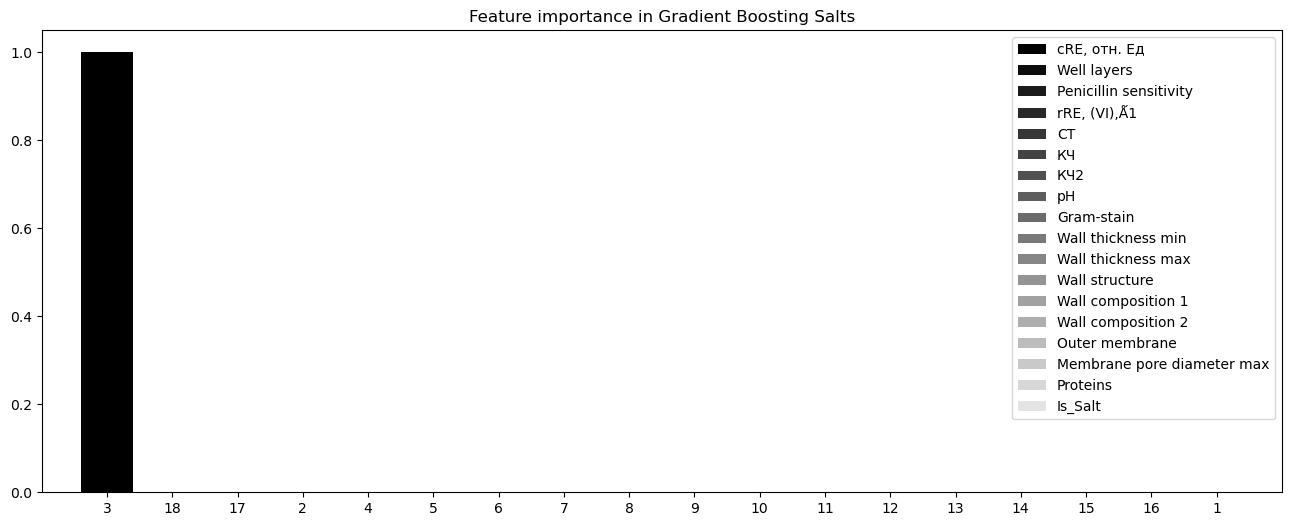

In [124]:
draw_importance(best_gradient_boost_salts.feature_importances_, "Gradient Boosting Salts")

In [137]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17, 18, 20],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_xgboost_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.3813224114312064
{'colsample_bytree': 0.3, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 20, 'subsample': 0.5}


Feature ranking:
1. Well layers 0.000000 
2. Penicillin sensitivity 0.000000 
3. rRE, (VI),Ǻ1 0.000000 
4. cRE, отн. Ед 0.000000 
5. СТ 0.000000 
6. КЧ 0.000000 
7. КЧ2 0.000000 
8. рН 0.000000 
9. Gram-stain 0.000000 
10. Wall thickness min 0.000000 
11. Wall thickness max 0.000000 
12. Wall structure 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Is_Salt 0.000000 


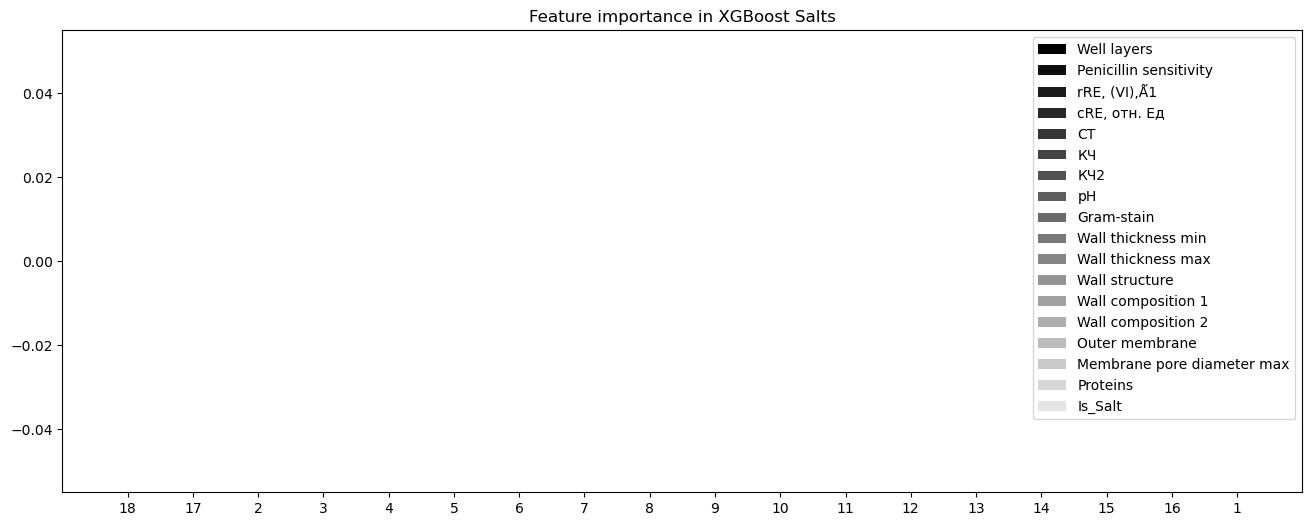

In [138]:
draw_importance(best_xgboost_salts.feature_importances_, "XGBoost Salts")

In [131]:
parameters = {
    'n_estimators': range(50, 1000, 50),
    'max_depth': [None] + list(range(1, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_random_forest_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.590776667892375
{'max_depth': 3, 'n_estimators': 250}


Feature ranking:
1. рН 0.328734 
2. cRE, отн. Ед 0.140279 
3. СТ 0.132614 
4. rRE, (VI),Ǻ1 0.099181 
5. КЧ2 0.066538 
6. КЧ 0.060544 
7. Outer membrane 0.020664 
8. Wall thickness min 0.018771 
9. Penicillin sensitivity 0.018585 
10. Well layers 0.018168 
11. Wall structure 0.014918 
12. Proteins 0.014640 
13. Wall composition 2 0.013849 
14. Wall composition 1 0.013710 
15. Gram-stain 0.013484 
16. Membrane pore diameter max 0.013090 
17. Wall thickness max 0.012231 
18. Is_Salt 0.000000 


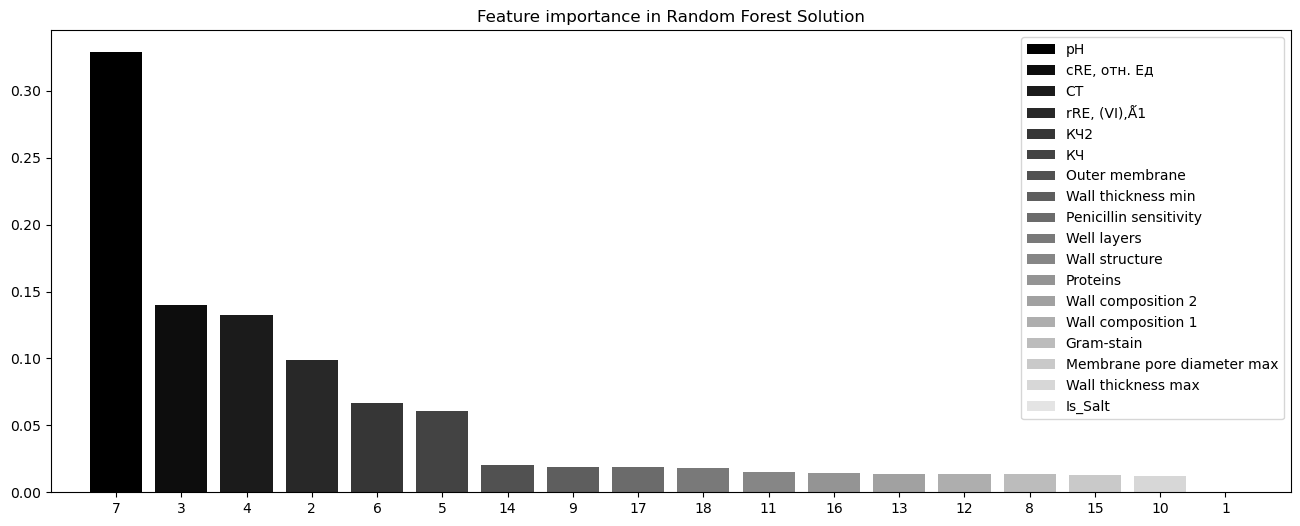

In [132]:
draw_importance(best_random_forest_solution.feature_importances_, "Random Forest Solution")

In [133]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_gradient_boost_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.215423312093525
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 32}


Feature ranking:
1. рН 0.418296 
2. rRE, (VI),Ǻ1 0.227963 
3. cRE, отн. Ед 0.117150 
4. КЧ 0.047952 
5. Wall thickness min 0.026634 
6. Gram-stain 0.025180 
7. Penicillin sensitivity 0.020043 
8. Wall composition 1 0.018542 
9. Outer membrane 0.014939 
10. Wall thickness max 0.014869 
11. СТ 0.014169 
12. Wall structure 0.012396 
13. Membrane pore diameter max 0.011974 
14. Well layers 0.011923 
15. Wall composition 2 0.007852 
16. Proteins 0.005315 
17. КЧ2 0.004802 
18. Is_Salt 0.000000 


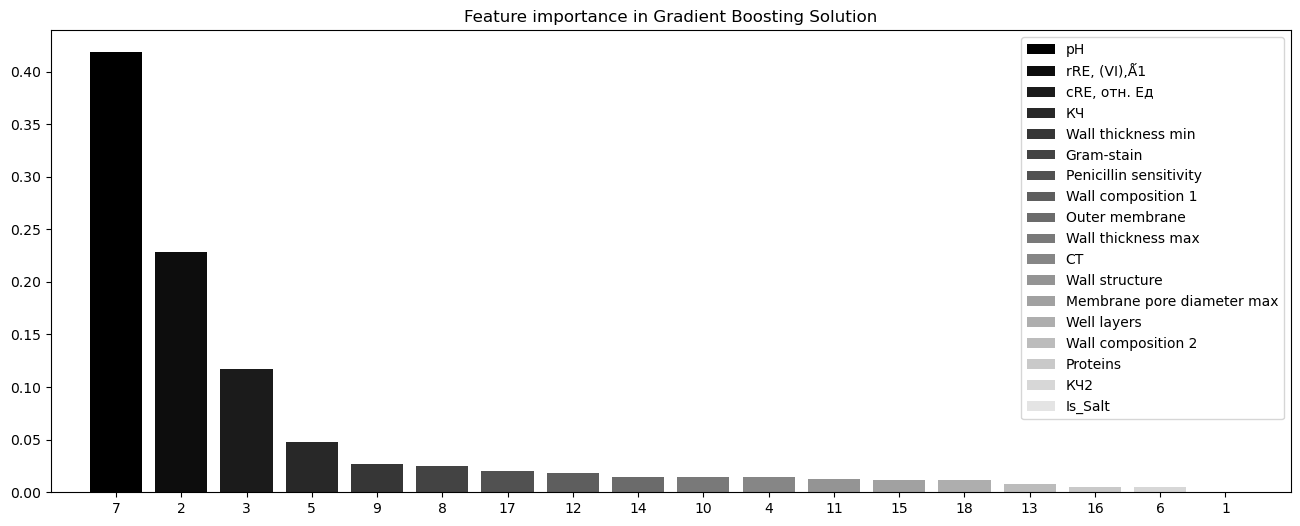

In [134]:
draw_importance(best_gradient_boost_solution.feature_importances_, "Gradient Boosting Solution")

In [135]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17, 18, 20],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_xgboost_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.837208872708407
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.4}


Feature ranking:
1. КЧ 0.395780 
2. СТ 0.165038 
3. рН 0.135873 
4. Gram-stain 0.103851 
5. rRE, (VI),Ǻ1 0.102469 
6. cRE, отн. Ед 0.096990 
7. Well layers 0.000000 
8. Penicillin sensitivity 0.000000 
9. КЧ2 0.000000 
10. Wall thickness min 0.000000 
11. Wall thickness max 0.000000 
12. Wall structure 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Is_Salt 0.000000 


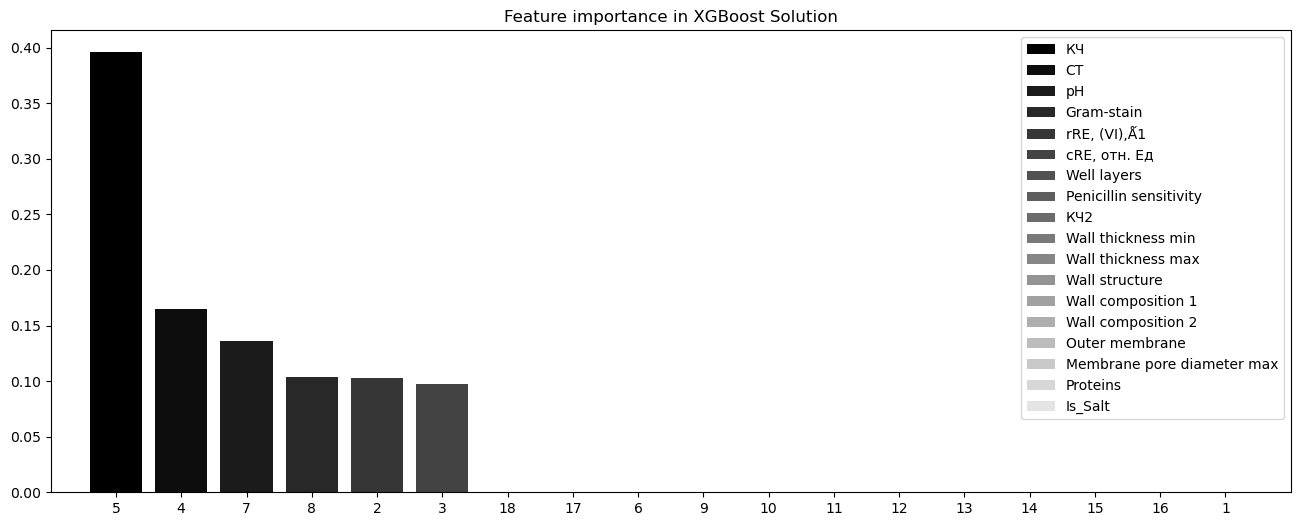

In [136]:
draw_importance(best_xgboost_solution.feature_importances_, "XGBoost Solution")